## Exploring Categorical Features

In [134]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet
from sklearn.grid_search import GridSearchCV

In [137]:
# Read 'gapminder.csv' into a DataFrame
gapminder = pd.read_csv('C:/Users/SOWMYA/Desktop/Datasets/16_Supervised Learning with Scikit - Learn/gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


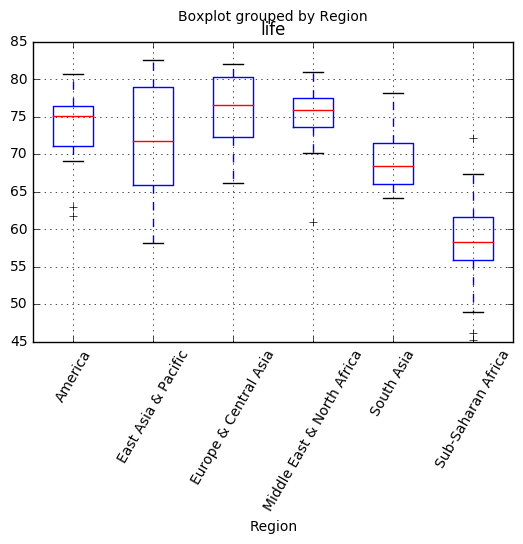

In [138]:
# Create a boxplot of life expectancy per region
gapminder.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

## Creating dummy variables

In [139]:
# Create dummy variables
df_region = pd.get_dummies(gapminder)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(gapminder, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [140]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,0.0,0.0,1.0,0.0,0.0
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,0.0,0.0,0.0,0.0,1.0
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,0.0,0.0,0.0,0.0,0.0
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,0.0,1.0,0.0,0.0,0.0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,1.0,0.0,0.0,0.0,0.0


## Regression with categorical features

In [141]:
y = df_region['life'].values
X = df_region.drop('life',axis=1).values

In [142]:
# Instantiate a ridge regressor
ridge = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[ 0.86808336  0.80623545  0.84004203  0.7754344   0.87503712]


## Bringing it all together : Pipeline for regression

In [147]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio' : np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016549771036


## Pipeline Performing Imputation and Classification SVM Model

## Dropping missing data

In [111]:
voting = pd.read_csv('C:/Users/SOWMYA/Desktop/Datasets/16_Supervised Learning with Scikit - Learn/voting.csv')
voting.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty-free-exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [112]:
# Convert '?' to NaN
voting[voting == '?'] = np.nan

# Print the number of NaNs
print(voting.isnull().sum())

# Print shape of original DataFrame
print('Shape of Original DataFrame: {}'.format(voting.shape))

# Drop missing values and print shape of new DataFrame
voting = voting.dropna()
print(voting.shape)

# Print shape of new DataFrame
print('Shape of DataFrame After Dropping All Rows with Missing Values: {}'.format(voting.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty-free-exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
(232, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [113]:
X = voting.drop('party', axis=1)
X = pd.get_dummies(X, drop_first = True).values

y = voting['party'].values

## Imputing missing data in a ML Pipeline I

In [114]:
# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)

# Instantiate the SVC classifier
clf = SVC()

# Setup the pipeline with the required steps
steps = [('imputation', imp),
        ('SVM', clf)]

## Imputing missing data in a ML Pipeline II

In [115]:
# Setup the pipeline steps
steps = [('imputation', Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.97      0.97      0.97        36
 republican       0.97      0.97      0.97        34

avg / total       0.97      0.97      0.97        70



Pipeline has performed imputation as well as classification

## Centering and scaling your data

In [116]:
white_wine = pd.read_csv('C:/Users/SOWMYA/Desktop/Datasets/16_Supervised Learning with Scikit - Learn/white-wine.csv')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [117]:
X = white_wine.drop('quality', axis=1).values

In [123]:
def is_quality(x):
    if x > 5:
        return False
    else:
        return True

y = white_wine['quality']
y = y.apply(is_quality)
y.values

array([False, False, False, ..., False, False, False], dtype=bool)

In [126]:
# Scale the features:
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print('Mean of Unscaled Features: {}'.format(np.mean(X)))
print('Standard Deviation of Unscaled Features: {}'.format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print('Mean of Scaled Features: {}'.format(np.mean(X_scaled)))
print('Standard Deviation of Scaled Features: {}'.format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072459593
Standard Deviation of Unscaled Features: 41.54494764094577
Mean of Scaled Features: 2.794799668923873e-15
Standard Deviation of Scaled Features: 1.0


Notice the difference in the mean and standard deviation of the scaled features compared to the unscaled features.

## Centering and scaling in a pipeline

In [131]:
# Setup the pipeline steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Create the pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

# Fit the pipeline to the training set
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


 It looks like scaling has significantly improved model performance

## Bringing it all together : Pipeline for classification

In [136]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C': [1, 10, 100],
             'SVM__gamma': [0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object
cv = GridSearchCV(pipeline, param_grid = parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = cv.predict(X_test)

# Compute and print metrics
print('Accuracy: {}'.format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print('Tuned Model Parameters: {}'.format(cv.best_params_))

Accuracy: 0.7795918367346939
             precision    recall  f1-score   support

      False       0.83      0.85      0.84       662
       True       0.67      0.63      0.65       318

avg / total       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}
